In [6]:
# 라이브러리 호출
%matplotlib inline
import glob
import json
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path
from PIL import Image
from collections import Counter
import numpy as np
from shapely.geometry import Polygon
from shapely.affinity import rotate
from tqdm.auto import tqdm

In [7]:
LANGUAGE_LIST = [ 'japanese','chinese', 'thai', 'vietnamese']


In [8]:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

def read_json(filename):
    with Path(filename).open(encoding='utf8') as handle:
        ann = json.load(handle)
    return ann

path_lists = glob.glob(f"../data/bottom_iou_data/*_receipt/ufo/train.json")

data = {}
data['images'] = {}
for path in path_lists:    
    json_data = read_json(path)
    images = list(json_data['images'].items())
    data['images'].update(dict(images))

print(f"Total number of images: {len(data['images'])}")

path_lists_100 = glob.glob(f"output_train_100.json")

data_train100 = {}
data_train100['images'] = {}
for path in path_lists_100:
    json_data = read_json(path)
    images = list(json_data['images'].items())
    data_train100['images'].update(dict(images))

print(f"Total number of images: {len(data_train100['images'])}")

Total number of images: 400
Total number of images: 400


In [9]:
keys_list = sorted(list(data['images'].keys()))
ja_keys_list = list()
zh_keys_list = list()
th_keys_list = list()
vi_keys_list = list()

for key in keys_list:
    if key.split('.')[1] == 'ja':
        ja_keys_list.append(key)
    elif key.split('.')[1] == 'zh':
        zh_keys_list.append(key)
    elif key.split('.')[1] == 'th':
        th_keys_list.append(key)
    elif key.split('.')[1] == 'vi':
        vi_keys_list.append(key)
t_key_list = [sorted(ja_keys_list),sorted(zh_keys_list),sorted(th_keys_list),sorted(vi_keys_list)]
for lan in t_key_list:
    print(len(lan))

100
100
100
100


In [10]:
print(len(t_key_list[0]))

100


In [11]:
# def get_box_angle(box):
#     # 박스의 긴 변 방향을 찾습니다
#     coords = np.array(box.exterior.coords)
#     edges = np.diff(coords, axis=0)
#     longest_edge = edges[np.argmax(np.sum(edges**2, axis=1))]
#     angle = np.arctan2(longest_edge[1], longest_edge[0])
#     return angle

# def angle_difference(box1, box2):
#     angle1 = get_box_angle(box1)
#     angle2 = get_box_angle(box2)
#     diff = angle2 - angle1
#     # 각도 차이를 -pi에서 pi 사이로 정규화합니다
#     return (diff + np.pi) % (2 * np.pi) - np.pi

# def rotated_boxes_iou(box1, box2):
#     poly1 = Polygon(box1)
#     poly2 = Polygon(box2)    
#     if not poly1.is_valid:
#         poly1 = poly1.buffer(0)
#     if not poly2.is_valid:
#         poly2 = poly2.buffer(0)    
#     inter_area = poly1.intersection(poly2).area    
#     union_area = poly1.area + poly2.area - inter_area    
#     iou = inter_area / union_area if union_area > 0 else 0    
#     return iou

# # 데이터 저장
# iou_data = {}
# def store_data(language, image, box, box2, iou, angle_diff):
#     if language not in data:
#         data[language] = {}
#     if image not in data[language]:
#         data[language][image] = {}
#     data[language][image][box] = {'ybox':box2, 'iou': iou, 'angle_diff': angle_diff}

# def get_data(language, image, box):
#     return data[language][image][box]

# # 모든 나라
# for lang in t_key_list:
#     country = lang[0].split('.')[1]
#     # 나라별 이미지
#     for li in tqdm(lang):
#         # 이미지별 박스
#         for p1 in data['images'][li]['words']:
#             max = 0 
#             mp2 = None
#             box1 = data['images'][li]['words'][p1]['points']
#             for p2 in data_train100['images'][li]['words']:
#                 box2 = data_train100['images'][li]['words'][p2]['points']
#                 iou = rotated_boxes_iou(box1, box2)
#                 if max < iou:
#                     max = iou
#                     mp2 = p2
#             angle_diff = None
#             if not mp2 == None: 
#                 box2 = data_train100['images'][li]['words'][mp2]['points']
#                 angle_diff = angle_difference(Polygon(box1), Polygon(box2))
#             store_data(country,li,p1,mp2,max,angle_diff)
                       



# store_data('english', 'image001.jpg', 'box1', 0.85, 15.5)
# store_data('english', 'image001.jpg', 'box2', 0.92, 5.2)
# store_data('french', 'image002.jpg', 'box1', 0.78, 30.1)

# print(get_data('english', 'image001.jpg', 'box1'))

In [12]:
# iou_list = []
# precision_list = []
# not_found_list = []
# used_ybox_list = []
# for lang in t_key_list:
#     country = lang[0].split('.')[1]
#     # 나라별 이미지
#     sumiou = 0
#     count = 0
#     tcount = 0 
#     ycount=0
#     Nount = 0
#     totalboxcount = 0
#     usedboxcount = 0
#     for li in lang:
#         # 이미지별 박스
#         imge = np.zeros(len(data_train100['images'][li]['words']))
#         totalboxcount +=len(data_train100['images'][li]['words'])
#         for p1 in data['images'][li]['words']:
#             ycount += len(data_train100['images'][li])
#             temp =  get_data(country, li, p1)
#             iou = temp['iou']
#             sumiou += iou
#             count += 1
#             if iou > 0.5:
#                 tcount +=1
#             if temp['ybox'] == None:
#                 Nount +=1
#             else:
#                 imge[int(temp['ybox'])] = 1
#         usedboxcount +=sum(imge)
#         #print(f'{(len(imge) - sum(imge))/count :.4f}')
#     iou_list.append(sumiou/count)
#     precision_list.append(tcount/count)
#     not_found_list.append(Nount/count)
#     used_ybox_list.append(usedboxcount/totalboxcount)
#     print(f'{country} : IoU {sumiou/count:.4f}, precision: {tcount/count:.4f}, not found: {Nount/count:.4f}, used ybox:{usedboxcount/totalboxcount: 0.4f} ')
 


In [13]:
# # 막대 그래프의 위치 설정
# c_countries = ['ja', 'zh', 'th', 'vi']
# x = np.arange(len(c_countries))
# width = 0.2

# # 그래프 생성
# fig, axs = plt.subplots(2, 2, figsize=(15, 12))
# fig.suptitle('Comparison of Metrics Across Countries', fontsize=16)

# metrics = [iou_list, precision_list, not_found_list, used_ybox_list]
# titles = ['IoU', 'Precision', 'Not Found', 'Used YBox']
# # 유명한 색상 팔레트에서 각 나라별 색상 지정
# colors = {
#     'ja': '#1f77b4',  # 일본 - 블루
#     'zh': '#ff7f0e',  # 중국 - 오렌지
#     'th': '#2ca02c',  # 태국 - 그린
#     'vi': '#d62728'   # 베트남 - 레드
# }

# for i, (ax, metric, title) in enumerate(zip(axs.flat, metrics, titles)):
#     bars = ax.bar(c_countries, metric, color=[colors[country] for country in c_countries])
#     ax.set_title(title)
#     ax.set_ylim(0, sorted(metric)[-1] * 1.1)  # 최대값의 110%로 y축 설정
    
#     # 막대 위에 값 표시
#     for bar in bars:
#         height = bar.get_height()
#         ax.text(bar.get_x() + bar.get_width()/2., height,
#                 f'{height:.4f}',
#                 ha='center', va='bottom', rotation=0)

#     # y축 레이블 설정
#     ax.set_ylabel('Value')

# plt.tight_layout()
# plt.subplots_adjust(top=0.92)  # 전체 제목과 서브플롯 사이 간격 조정
# plt.show()

100%|██████████| 10/10 [00:00<00:00, 15.76it/s]


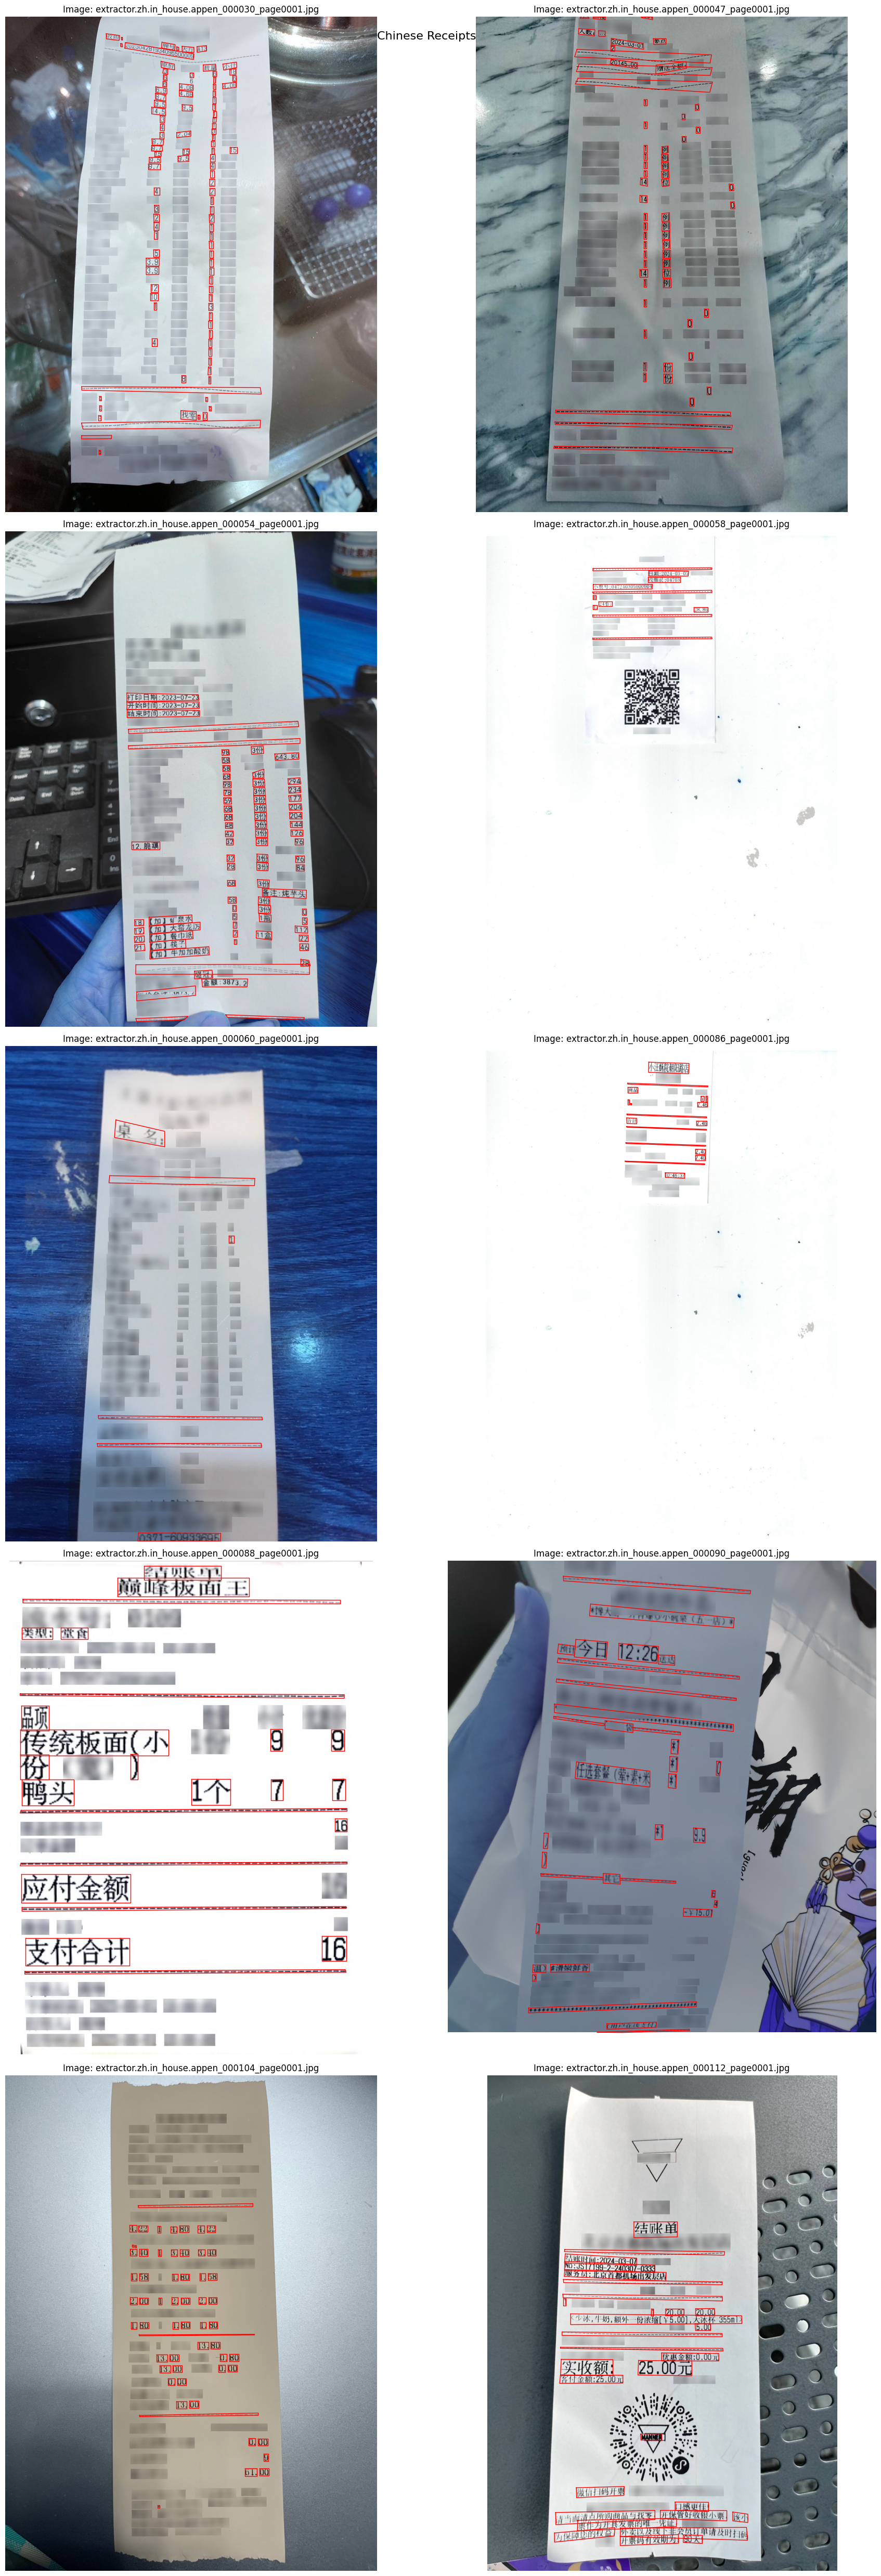

In [ ]:
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
LANGUAGE_LIST = [ 'japanese','chinese', 'thai', 'vietnamese']

def preprocess_receipt(image):
    # 그레이스케일 변환
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    enhanced = clahe.apply(gray)

    # 가우시안 블러 적용
    blurred = cv2.GaussianBlur(enhanced, (3, 3), 0)

    background = cv2.dilate(blurred, np.ones((3,3), np.uint8), iterations=3)
    diff = cv2.absdiff(blurred, background)
    diff = cv2.normalize(diff, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
     # 4. 엣지 검출
    edges = cv2.Canny(diff, 30, 90)
    # 5. 엣지를 이용한 마스크 생성
    mask = cv2.dilate(edges, np.ones((3,3), np.uint8), iterations=1)
    
    # 6. 마스크를 이용한 텍스트 영역 추출
    text_region = cv2.bitwise_and(diff, diff, mask=mask)
    # 적응형 이진화
    binary = cv2.adaptiveThreshold(text_region, 190, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                   cv2.THRESH_BINARY, 15, 5)
    
    # 모폴로지 연산 (텍스트 영역 강화)
    kernel = np.ones((3,3), np.uint8)
    
    morph = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
      # 9. 최종 노이즈 제거
    denoised = cv2.fastNlMeansDenoising(morph, None, 10, 7, 21)
    return morph

def plot_bbox_language_grid(image_keys, lang, num_cols=2):
    num_images = len(image_keys)
    num_rows = math.ceil(num_images / num_cols)
    
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 10*num_rows))
    fig.suptitle(f'{lang.capitalize()} Receipts', fontsize=16)
    
    for idx, image_key in enumerate(tqdm(image_keys)):
        row = idx // num_cols
        col = idx % num_cols
        
        ax = axs[row, col] if num_rows > 1 else axs[col]
    
        image = cv2.imread(f'../data/bottom_iou_data/{lang}_receipt/img/train/{image_key}')
          
        ax.imshow(image)
        ax.set_title(f'Image: {image_key}')
        
        word_ann = data["images"][image_key]['words']
        for word in word_ann.values():
            poly = np.int32(word['points'])
            poly = poly.reshape(-1, 2)
            ax.plot(np.append(poly[:, 0], poly[0, 0]), np.append(poly[:, 1], poly[0, 1]), color='red', linewidth=1)

        # word_ann1 = data_train100["images"][image_key]['words']    
        # for word in word_ann1.values():
        #     poly = np.int32(word['points'])
        #     poly = poly.reshape(-1, 2)
        #     ax.plot(np.append(poly[:, 0], poly[0, 0]), np.append(poly[:, 1], poly[0, 1]), color='blue', linewidth=1)
        
        ax.axis('off')
    
    # 빈 서브플롯 제거
    for idx in range(num_images, num_rows * num_cols):
        row = idx // num_cols
        col = idx % num_cols
        fig.delaxes(axs[row][col] if num_rows > 1 else axs[col])
    
    plt.tight_layout()
    plt.show()

# 사용 예시
country = 1
image_keys = t_key_list[country][14:20]  # 10개의 이미지 키를 선택
plot_bbox_language_grid(image_keys, LANGUAGE_LIST[country])